<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui&nbsp;</span><br/>
___

This tutorial is intended for people who want an example showing how to run Telemac 2D in an interactive mode with the help of the Python programming language.

# Import Telemac2D as a Python module

In [1]:
import telapy.api.t2d

The module 'TelApy.api.t2d' is located in the '$HOMETEL/scripts/python3/telapy/api' directory. If an error occurs while attempting to import, check the value of the environment variable PYTHONPATH. Alternatively you can also work with the file 'apiT2d.py' listed in your working directory.


# Problem instantiation

A problem is created from the "breach" example

In [2]:
# Changing of directory : 'examples' directory of the Telemac sources
import os, sys
HOMETEL = os.environ.get('HOMETEL')
os.chdir(HOMETEL + '/examples/telemac2d/breach')

# Instantiation of a Telemac2d object from the test case named 'breach'
# - steering file : 't2d_breach.cas'
# - language : french (1) or english (2: default)
from telapy.api.t2d import Telemac2d
from mpi4py import MPI
my_problem = Telemac2d('t2d_breach.cas', lang=1, comm=MPI.COMM_WORLD)

  ~> Checking keyword/rubrique coherence


An object 'my_problem' is now created.

# Read the steering file

In [3]:
my_problem.set_case()

 MASTER PROCESSOR NUMBER            0  OF THE GROUP OF            1
 READ_CONFIG: FILE CONFIG NOT FOUND: CONFIG
 DEFAULTS VALUES OF LU AND LNG:            6  AND            2
 LISTING OF TELEMAC2D------------------------------------------------------------------------------

                TTTTT  EEEEE  L      EEEEE  M   M  AAAAA  CCCCC
                  T    E      L      E      MM MM  A   A  C    
                  T    EEE    L      EEE    M M M  AAAAA  C    
                  T    E      L      E      M   M  A   A  C    
                  T    EEEEE  LLLLL  EEEEE  M   M  A   A  CCCCC
                                                               
                        2D    VERSION V8P4   FORTRAN 2003       







                        ~^~^~^~^~^~^~^~^~^~^~^^~^~^~^~^~^~     
                          ~                            ~       
                               \   '    o      '               
                               /\ o       \  o                 
            

0

# State initialisation

In [4]:
my_problem.init_state_default()

 OPENING FILES FOR TELEMAC2D               
 OPENING: T2DGEO-geo_breach.slf
 OPENING: T2DCLI-geo_breach.cli
 OPENING: T2DPRE-ini_breach.slf
 OPENING: T2DRES-r2d_breach.slf
 OPENING: T2DIMP-t2d_breach.liq
 OPENING: T2DBRC-breach.txt



                          *****************************
                          *    MEMORY ORGANIZATION    *
                          *****************************



 READ_MESH_INFO: TITLE= C:\RuptureDigue2D\Modele.MAT                                            
            NUMBER OF ELEMENTS:    26449
            NUMBER OF POINTS:    13648

            TYPE OF ELEMENT: TRIANGLE            
            TYPE OF BND ELEMENT: POINT               

            SINGLE PRECISION FORMAT (R4)
  
 MXPTEL (BIEF) : MAXIMUM NUMBER OF ELEMENTS AROUND A POINT:   8
                 MAXIMUM NUMBER OF POINTS AROUND A POINT:   8
 USER_CORRXY (BIEF):NO MODIFICATION OF COORDINATES

 MESH: MESH   ALLOCATED



                     *************************************
   

 GLOBAL NUMBER:        43
  AND COORDINATES:     5000.000           0.000000    

 BOUNDARY    2 : 
  BEGINS AT BOUNDARY POINT:      544 , WITH GLOBAL NUMBER:       158
  AND COORDINATES:     5000.000           26.00000    
  ENDS AT BOUNDARY POINT:      836 , WITH GLOBAL NUMBER:         2
  AND COORDINATES:     0.000000           26.00000    

 CORFON (TELEMAC2D): NO MODIFICATION OF BOTTOM



 TITLE OF PREVIOUS COMPUTATION: maillage                                                                

 NAME: BOTTOM            UNIT: M               
 NAME: FREE SURFACE      UNIT: M               
 NAME: VELOCITY U        UNIT: M/S             
 NAME: VELOCITY V        UNIT: M/S             

 READ_DATASET : READ OF RECORD     1


 TIME OF RECORD:     15000.00     S
 ELAPSED TIME RESET TO ZERO
 RESCUE : WATER DEPTH COMPUTED WITH BATHYMETRY
          AND SURFACE ELEVATION
 PRE READING THE BREACH FILE

 SOURCE POINT            1 PUT ON POINT
   2099.5356445312500       AND    15.41549968719482

# Mesh view

INT           22 PUT ON POINT
   2966.7055664062500       AND    64.469100952148438     
 LOCATED AT    2.7964242686219909       METRES

 SOURCE POINT           23 PUT ON POINT
   2966.7055664062500       AND    64.469100952148438     
 LOCATED AT   0.59310953837645364       METRES

 SOURCE POINT           24 PUT ON POINT
   2966.7055664062500       AND    64.469100952148438     
 LOCATED AT    3.3073222532755908       METRES

 SOURCE POINT           25 PUT ON POINT
   2972.6157226562500       AND    67.190597534179688     
 LOCATED AT    2.2190606104945716       METRES

 SOURCE POINT           26 PUT ON POINT
   2977.2055664062500       AND    62.588100433349609     
 LOCATED AT    2.7054154090891176       METRES

 SOURCE POINT           27 PUT ON POINT
   2977.2055664062500       AND    62.588100433349609     
 LOCATED AT    2.9943069478991204       METRES

 SOURCE POINT           28 PUT ON POINT
   2982.4057617187500       AND    65.612899780273438     
 LOCATED AT   0.7462701801708

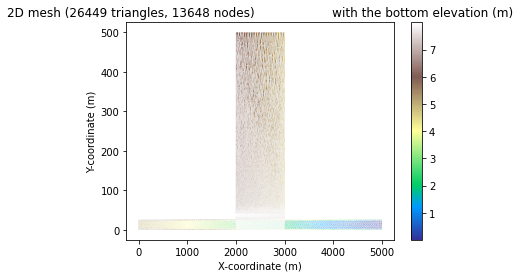

In [5]:
my_figure = my_problem.show_mesh()

# State view

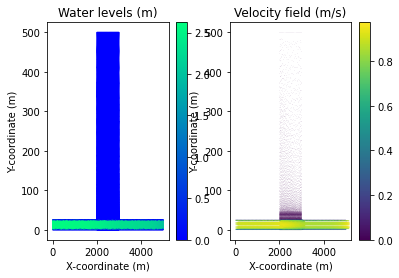

In [6]:
my_new_figure = my_problem.show_state()

# Get the number of time steps

In [7]:
number_of_time_steps = my_problem.get('MODEL.NTIMESTEPS')
number_of_time_steps

5400

# New array to save the value of a water depth

In [8]:
import numpy as np

H_save = np.zeros((number_of_time_steps,))

# Get the node number corresponding to the coordinates (2030, 40)

In [9]:
H_node = my_problem.get_node(2030., 40.)
print(H_node)

8848


# Simulation and save the water depth

In [10]:
# We will manually reduce the number of time steps to speed up the compuation
# Delete the follwing line to run the full case
number_of_time_steps = 100
for i in range(number_of_time_steps):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    percent = 100*i//(max(number_of_time_steps-1,1))
    sys.stdout.write("[%-20s] %d%%" % ('='*(percent//5), percent))
    sys.stdout.flush()
    
    my_problem.run_one_time_step()
    
    H_save[i] = my_problem.get('MODEL.WATERDEPTH', i=H_node-1)

[                    ] 0%

 THE LIQUID BOUNDARIES FILE CONTAINS
           3  LINES WITH:
 SL(1)    Q(2)     
[                    ] 1%

 USING STREAMLINE VERSION V8P4 FOR CHARACTERISTICS
[                    ] 2%

[                    ] 3%

[                    ] 4%

[=                   ] 5%

[=                   ] 6%

[=                   ] 7%

[=                   ] 8%

[=                   ] 9%

[==                  ] 10%

[==                  ] 11%

[==                  ] 12%

[==                  ] 13%

[==                  ] 14%

[===                 ] 15%

[===                 ] 16%

[===                 ] 17%

[===                 ] 18%

[===                 ] 19%

[====                ] 20%

[====                ] 21%

[====                ] 22%

[====                ] 23%

[====                ] 24%

[=====               ] 25%

[=====               ] 26%

[=====               ] 27%

[=====               ] 28%

[=====               ] 29%

[======              ] 30%

[======              ] 31%

[======              ] 32%

[======              ] 33%

[======              ] 34%

[=======             ] 35%

[=======             ] 36%

[=======             ] 37%

[=======             ] 38%

[=======             ] 39%

[========            ] 40%

[========            ] 41%

[========            ] 42%

[========            ] 43%

[========            ] 44%

[=========           ] 45%

[=========           ] 46%

[=========           ] 47%

[=========           ] 48%

[=========           ] 49%

[==========          ] 50%

[==========          ] 51%

[==========          ] 52%

[==========          ] 53%

[==========          ] 54%

[===========         ] 55%

[===========         ] 56%

[===========         ] 57%

[===========         ] 58%

[===========         ] 59%

[============        ] 60%

[============        ] 61%

[============        ] 62%

[============        ] 63%

[============        ] 64%

[=============       ] 65%

[=============       ] 66%

[=============       ] 67%

[=============       ] 68%

[=============       ] 69%

[==============      ] 70%

[==============      ] 71%

[==============      ] 72%

[==============      ] 73%

[==============      ] 74%

[===============     ] 75%

[===============     ] 76%

[===============     ] 77%

[===============     ] 78%

[===============     ] 79%

[================    ] 80%

[================    ] 81%

[================    ] 82%

[================    ] 83%

[================    ] 84%

[=================   ] 85%

[=================   ] 86%

[=================   ] 87%

[=================   ] 88%

[=================   ] 89%

[==================  ] 90%

[==================  ] 91%

[==================  ] 92%

[==================  ] 93%

[==================  ] 94%

[=================== ] 95%

[=================== ] 96%

[=================== ] 97%

[=================== ] 98%

[====================] 100%

# Plot the water depth vs time

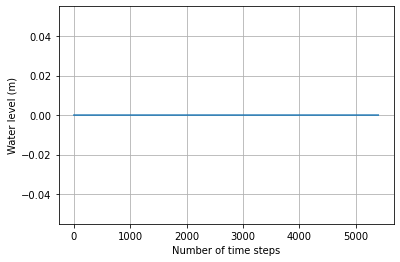

In [11]:
import matplotlib.pyplot as plt

plt.plot(H_save)
plt.grid()
plt.xlabel("Number of time steps")
plt.ylabel("Water level (m)")
plt.show()

# And finally, delete the case

In [12]:
ierr = my_problem.finalize()

del my_problem




                     *************************************
                     *    END OF MEMORY ORGANIZATION:    *
                     *************************************




 CORRECT END OF RUN



 ELAPSE TIME : 
                              3  SECONDS
